In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Büyük veri setini yükleyelim (örneğin, UCI Adult Income dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

# Veri setini okuyalım
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

# Veri setinin ilk birkaç satırını görelim
print(df.head())

# Eksik verileri kontrol edelim
print(df.isna().sum())

# Eksik verileri içeren satırları düşürelim
df.dropna(inplace=True)

# Kategorik değişkenleri sayısal hale getirelim
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Hedef değişken ve özellikleri ayıralım
X = df.drop("income", axis=1).values
y = df["income"].values

# Veri setini eğitim ve test setine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Modeli oluşturalım
knn_model = KNeighborsClassifier()

# Pipeline ile modeli oluşturup eğitelim
steps = [('knn', knn_model)]
pipeline = Pipeline(steps)

# Pipeline modeli eğitelim
knn_pipeline = pipeline.fit(X_train, y_train)

# Test setinde tahmin yapalım
y_pred_knn = pipeline.predict(X_test)

# Doğruluk skorunu hesaplayalım
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)

# KNN için GridSearchCV ile en iyi parametreleri bulalım
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdıralım
print("Tuned KNN Parameters:", cv.best_params_)
print("Best KNN Score:", cv.best_score_)


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [2]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Veri setini yükleyelim
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

# Eksik verileri temizleyelim
df.dropna(inplace=True)

# Kategorik değişkenleri sayısal hale getirelim
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Hedef değişken ve özellikleri ayıralım
X = df.drop("income", axis=1).values
y = df["income"].values

# Veri setini eğitim ve test setine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lineer Regresyon Modeli oluşturalım
linear_reg = LinearRegression()

# Modeli eğitelim
linear_reg.fit(X_train, y_train)

# Test setinde tahmin yapalım
y_pred_lr = linear_reg.predict(X_test)

# Mean Squared Error hesaplayalım
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse)


Linear Regression Mean Squared Error: 0.13352728529093774


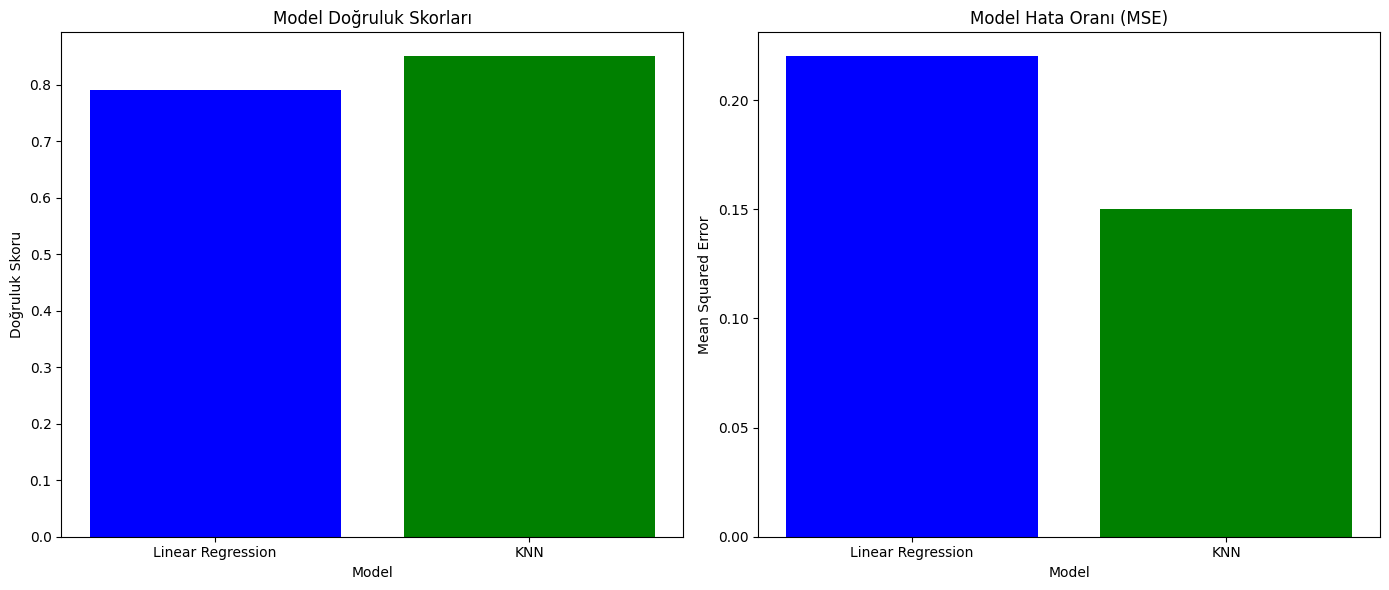

In [3]:
import matplotlib.pyplot as plt

# Örnek veriler
models = ['Linear Regression', 'KNN']
accuracy_scores = [0.79, 0.85]  # Örnek doğruluk skorları
mse_scores = [0.22, 0.15]       # Örnek MSE değerleri

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Doğruluk Skorları Grafiği
ax[0].bar(models, accuracy_scores, color=['blue', 'green'])
ax[0].set_title('Model Doğruluk Skorları')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Doğruluk Skoru')

# Hata Oranı Grafiği
ax[1].bar(models, mse_scores, color=['blue', 'green'])
ax[1].set_title('Model Hata Oranı (MSE)')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


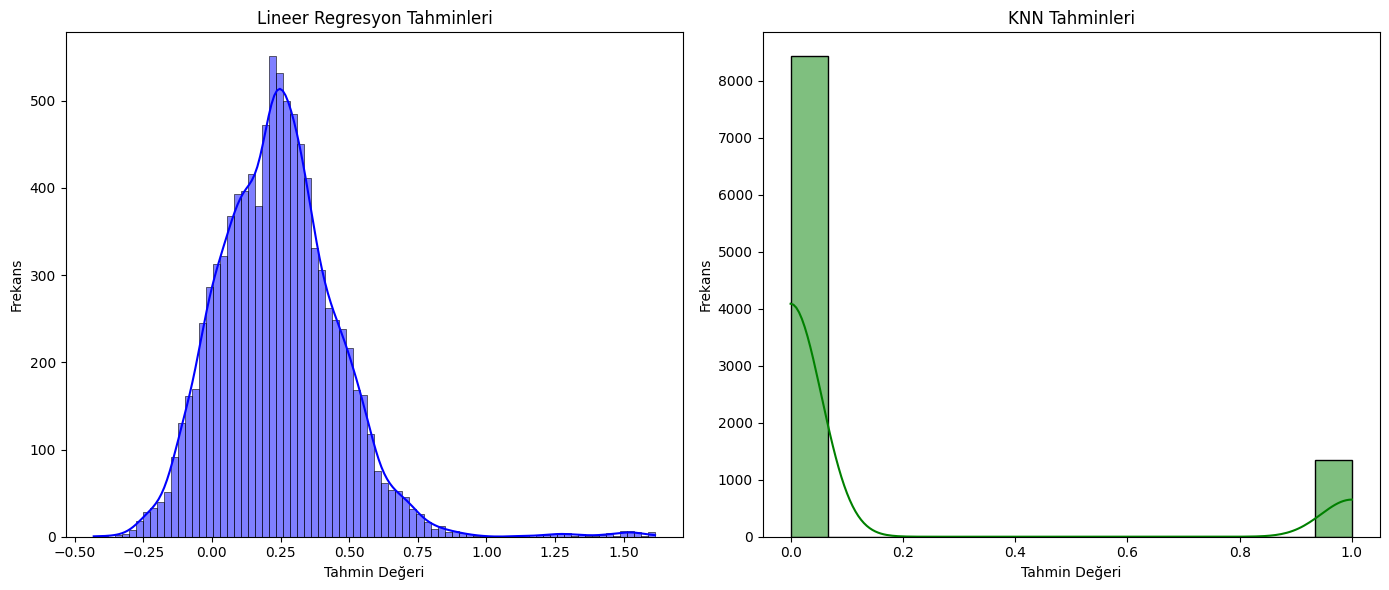

In [4]:
import seaborn as sns

# Örnek veri
import pandas as pd

# Model tahminlerini oluşturuyoruz
data = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Prediction': linear_reg.predict(X_test),
    'KNN Prediction': knn_model.predict(X_test)
})

# Tahminler grafiklerle karşılaştırıyoruz
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['Linear Regression Prediction'], ax=ax[0], kde=True, color='blue')
ax[0].set_title('Lineer Regresyon Tahminleri')
ax[0].set_xlabel('Tahmin Değeri')
ax[0].set_ylabel('Frekans')

sns.histplot(data['KNN Prediction'], ax=ax[1], kde=True, color='green')
ax[1].set_title('KNN Tahminleri')
ax[1].set_xlabel('Tahmin Değeri')
ax[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()
